# SSCx Circuit Analyses

We analyze rat somatosensory circuits build under the SSCx-Dissemination project (2019-2020).

# Introduction

We will use DMT, our analysis framework. With DMT we strive to provide a 
framework to analyze composition and connectome phenomena of a brain-circuit,
that keeps the scientific aspect of the analysis apart from the engineering 
details of the circuit model.

Lets begin by importing the required libraries, and setting up the circuits to study.

In [1]:
#essential imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from dmt.tk.phenomenon import Phenomenon
from dmt.tk.parameters import Parameters
from dmt.tk.plotting import Bars, LinePlot, HeatMap
from neuro_dmt import terminology
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.composition\
    import CompositionAnalysesSuite
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.connectome\
    import ConnectomeAnalysesSuite
from neuro_dmt.models.bluebrain.circuit.atlas import\
    BlueBrainCircuitAtlas
from neuro_dmt.models.bluebrain.circuit.model import\
    BlueBrainCircuitModel,\
    CircuitProvenance
from neuro_dmt.models.bluebrain.circuit.adapter import\
    BlueBrainCircuitAdapter
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.tools\
    import PathwayMeasurement
from neuro_dmt.analysis.circuit import BrainCircuitAnalysis

('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mtype', 'etype', 'synapse_class')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi')


## Paths to the circuits.

We set paths to the circuits to analyze.

In [2]:
#paths to circuits
project =\
    os.path.join(
        "/gpfs/bbp.cscs.ch/project")
proj_sscx_diss=\
    os.path.join(
        project,
        "proj83")
data_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "data")
atlases_sscx_diss=\
    os.path.join(
        data_sscx_diss,
        "atlas/S1/MEAN")
circuits_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "circuits")
atlas_bio_m =\
    BlueBrainCircuitAtlas(
        path=os.path.join(
                atlases_sscx_diss, "P14-MEAN"))
path_bio_m =\
    os.path.join(
        circuits_sscx_diss,
        "Bio_M/20191206")
circuit_bio_m =\
    BlueBrainCircuitModel(
        path_circuit_data=path_bio_m,
            provenance=CircuitProvenance(
                label="SSCxRatDisseminationBioM",
                authors=["BBP Team"],
                release_date="20191212",
                uri=path_bio_m,
                animal="Wistar Rat",
                age="P14",
                brain_region="SSCx"))
adapter =\
    BlueBrainCircuitAdapter()
suite_connectome_analyses =\
    ConnectomeAnalysesSuite(
        sample_size=20)

In [3]:
adapter.get_provenance(circuit_bio_m)

{'age': 'P14',
 'animal': 'Wistar Rat',
 'authors': ['BBP Team'],
 'brain_region': 'SSCx',
 'date_release': 'YYYYMMDD',
 'label': 'SSCxRatDisseminationBioM',
 'uri': '/gpfs/bbp.cscs.ch/project/proj83/circuits/Bio_M/20191206'}

## Mock Circuit

For facilitate development of analyses and the associated adapter, we will use
a mock circuit that behaves the same as a circuit loaded via BluePy.

In [4]:
#mock circuit
from neuro_dmt.models.bluebrain.circuit.mock.circuit import\
    MockCircuit
from neuro_dmt.models.bluebrain.circuit.mock.test.mock_circuit_light import\
    circuit_composition,\
    circuit_connectivity

bluepy_mock_circuit =\
    MockCircuit.build(
        circuit_composition,
        circuit_connectivity)
mock_circuit_model =\
    BlueBrainCircuitModel(
        bluepy_mock_circuit,
        label="BlueBrainCircuitModelMockLight")

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/mock/test/__init__.py
	lineno: 	138
	code_context: 	['        __log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 2
with number of excitatory mtypes: 1

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/mock/test/__init__.py
	lineno: 	138
	code_context: 	['        __log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 3
with number of excitatory mtypes: 1

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-23 14:14:44>

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	107
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 4
with number of excitatory mtypes: 1

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	107
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 5
with number of excitatory mtypes: 3

test develop mock circuit Logger                                                
DEBUGINFO@<2020

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	107
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 6
with number of excitatory mtypes: 4

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	107
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 6
with number of excitatory mtypes: 4

test develop mock circuit Logger                                                
DEBUGINFO@<2020

48it [00:00, 478.47it/s]

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/mock/builder.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Mock circuit builder: get_connectome(...)



82304it [02:36, 526.13it/s]


Let us set the circuit to work with:

In [5]:
circuit_model = mock_circuit_model

# Connectome Phenomena

We will analyze the connectome of a brain circuit as a directed network.
The nodes in this network, *i.e.* the cells in the circuit, have properties, 
and we must know the distribution of these nodes. Physical distributions (
such as over $X, Y, Z$ coordinates, or by region and layer) will be studied as 
composition analyses. For connectome analyses we consider distribution of 
cell counts as a function of *mtype*. 

In [6]:
from abc import abstractmethod
from dmt.tk.collections import get_list, take
from dmt.tk.field import ABCWithFields, Field, lazyfield

def head(xs):
    return list(take(xs, 1))[0]
        
class StatisticalMeasurement(ABCWithFields):
    """
    An abstract base class to make statistical measurements.
    """
    value = Field(
        """
        Measurement method for a single set of parameter-values.
        """)
    variable = Field(
        """
        Name to give the measured phenomenon.
        """)
    sampling_methodology = Field(
        """
        Random or exhaustive?
        """,
        __default_value__=terminology.sampling_methodology.random)
    sample_size = Field(
        """
        Number of indiciduals in a sample.
        """,
        __default_value__=20)
    summaries = Field(
        """
        Summaries required, if making a summary measurement.
        """,
        __default_value__=["size", "count", "sum", "mean", "std"])
    
    @abstractmethod
    def sample(self, *args, **kwargs):
        """
        Measure a phenomenon (provided by value of `Field value`)
        on a sample of parameter-sets...
        """
        raise NotImplementedError
        
        
    def sample_one(self, *args, **kwargs):
        """..."""
        if self.sampling_methodology != terminology.sampling_methodology.random:
            raise TypeError(
                """
                A single size sample makes sense only when sampling randomly.
                This instance of {} was set to
                \t `sampling_methodology {}`.
                """.format(
                    self.__class__.__name__,
                    self.sampling_methodology))
                
        return head(self.sample(*args, **kwargs))
    
    def collect(self, *args, **kwargs):
        """..."""
        sample =[
            m for m in self.sample(*args, **kwargs)]
        try:
            return pd.concat(sample, axis=1)
        except TypeError:
            return pd.Series(sample, name=self.variable)
        
    @lazyfield
    def aggregators(self):
        listed_aggregators =\
            get_list(self.summaries)
        return\
            listed_aggregators[0] if len(listed_aggregators) == 1\
                else listed_aggregators
        
    def summary(self, *args, **kwargs):
        collection = self.collect(*args, **kwargs)
        try:
            return collection.agg(self.aggregators, axis=1)
        except ValueError:
            return collection.agg(self.aggregators)
    
    
    
class CellMeasurement(StatisticalMeasurement):
    """
    ...
    """
    
    def _get_cells(self, cell_type, circuit_model, adapter):
        """..."""
        all_cells =\
            adapter.get_cells(circuit_model, **cell_type)
        sampling_random =\
            self.sampling_methodology == terminology.sampling_methodology.random
        return\
            all_cells.sample(self.sample_size)\
            if sampling_random and self.sample_size < all_cells.shape[0]\
                else all_cells
    
        
    def sample(self, circuit_model, adapter, cell_type, **kwargs):
        """..."""
        try:
            sampling_methodology = kwargs.pop("sampling_methodology")
        except KeyError:
            sampling_methodology = None
            
        if (sampling_methodology and
            sampling_methodolgy != self.sampling_methodology):
            LOGGER.warn(
                """
                Argument `sampling_methodology` will be dropped.
                A sampling methodology of {} was defined for this instance
                of {} computing phenomenon {}.
                `.sample(...)` was called with sampling methodology {}.
                """.format(
                    self.sampling_methodology,
                    self.__class__.__name__,
                    self.method.__name__,
                    sampling_methodology,))
        cells =\
            self._get_cells(cell_type, circuit_model, adapter)
        for _, cell in cells.iterrows():
            try:
                measured_value = self.value(cell)
            except TypeError:
                measured_value = cell[self.variable]
            
            yield measured_value


In [7]:
count_cells_mtype =\
    CellMeasurement(
        value=lambda cell: 1.,
        variable="count_cells",
        sampling_methodology=terminology.sampling_methodology.exhaustive,
        summaries="sum")

In [8]:
adapter.get_cells(circuit_model).head()

,etype,layer,morph_class,mtype,nucleus,region,synapse_class,x,y,z,gid
0,bNAC,1,not-defined,L1_DAC,not-defined,S1HL,INH,139.604605,14.814291,86.605765,0
1,bNAC,1,not-defined,L1_DAC,not-defined,S1HL,INH,79.684175,68.062091,196.664293,1
2,bNAC,1,not-defined,L1_DAC,not-defined,S1HL,INH,65.255514,13.076423,206.605777,2
3,bNAC,1,not-defined,L1_DAC,not-defined,S1HL,INH,232.424577,40.109341,80.047655,3
4,bNAC,1,not-defined,L1_DAC,not-defined,S1HL,INH,34.693911,106.331585,122.022259,4


## Count of cells by mtype.

Pathways mtype --> mtype are the most interesting. We can investigate the number
of cells of a given mtype in a circuit.

100%|██████████| 380/380 [00:11<00:00, 32.25it/s]


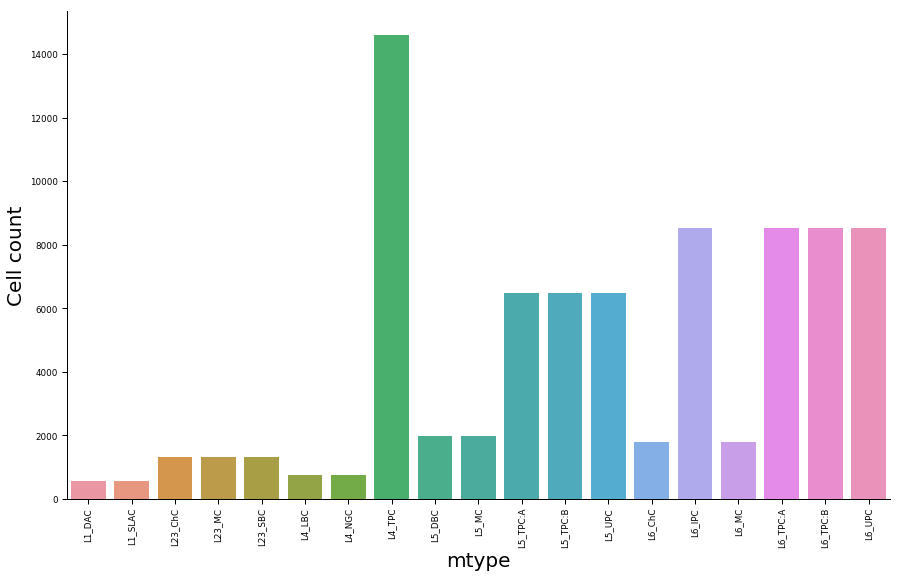

In [6]:
phenomenon_count_cells_by_mtype =\
    Phenomenon(
        "Cell count",
        "Number of cells.",
        group="Composition")

def get_cell_count(circuit, adapter,
                   sampling_methodology=terminology.sampling_methodology.exhaustive,
                   **query):
    return adapter.get_cells(circuit, **query).shape[0]

parameters_mtypes =\
    Parameters(
        lambda adapter, circuit: (
            {"mtype": mtype} for mtype in adapter.get_mtypes(circuit)),
        size=1)
    
analysis_cell_count_mtype =\
    BrainCircuitAnalysis(
        introduction="""
        Here we analyze distribution of cells by mtype in a brain circuit mode.
        """,
        methods="""
        Cells in a circuit were grouped by their mtype and counted.
        """,
        phenomenon=phenomenon_count_cells_by_mtype,
        AdapterInterface=suite_connectome_analyses.AdapterInterface,
        measurement_parameters=parameters_mtypes,
        sample_measurement=get_cell_count,
        plotter=Bars(
            xvar="mtype",
            xlabel="mtype",
            yvar="cell_count",
            ylabel="Cell count",
            order="mtype"))

report_cell_count_mtype =\
    analysis_cell_count_mtype(circuit_model, adapter)

## Afferent degree of cells, by mtype.

We investigate total incoming connections (*i.e.* connections afferent on a cell).

In [6]:
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.tools\
    import PathwayMeasurement

measurement_afferent_degree =\
    PathwayMeasurement(
        value=lambda connections: np.ones(connections.shape[0]),
        variable="degree_afferent",
        sample_size=20,
        specifiers_cell_type=["mtype"],
        direction="AFF",
        by_soma_distance=False,
        sampling_methodology=terminology.sampling_methodology.random_one)

measurement_afferent_degree_batch =\
    PathwayMeasurement(
        value=lambda connections: np.ones(connections.shape[0]),
        variable="degree_afferent",
        sample_size=20,
        specifiers_cell_type=["mtype"],
        direction="AFF",
        by_soma_distance=False,
        sampling_methodology=terminology.sampling_methodology.random_batch)

analysis_degree_afferent =\
    BrainCircuitAnalysis(
        phenomenon=Phenomenon(
            "Afferent Degree",
            "Number of incoming connections of a cell.",
            group="Connectome"),
        introduction="""
        Afferent degree of cells, grouped by their mtype.
        """,
        methods="""
        Afferent degree was measured for cells of a given mtype.
        """,
        measurement_parameters=Parameters(
            lambda adapter, circuit: (
                {"post_synaptic_cell": {"mtype": mtype}}
                for mtype in adapter.get_mtypes(circuit)),
                size=1),
        sample_measurement=measurement_afferent_degree.sample_one,
        plotter=Bars(
            xvar="mtype",
            xlabel="mtype",
            yvar="afferent_degree",
            order="mtype"))



In [7]:
cell_l6_tpca =\
    measurement_afferent_degree._sample_cells(
        circuit_model, adapter,
        cell_type={"mtype": "L6_TPC:A"},
        size=1)
cell_l6_tpca

etype                   bNAC
layer                      6
morph_class      not-defined
mtype               L6_TPC:A
nucleus          not-defined
region                  S1Tr
synapse_class            EXC
x                    238.228
y                     1499.3
z                    31.4409
gid                    55495
Name: 55495, dtype: object

In [8]:
connections =\
    adapter.get_connections(
        circuit_model,
        xcells.gid.values,
        direction="AFF")
print(connections.shape)
cells_connected =\
    adapter.get_cells(circuit_model)\
           .loc[connections.pre_gid.to_numpy(np.int32)]\
           .assign(post_gid=connections["post_gid"].to_numpy(np.int32),
                   number=1)\
           [["mtype", "post_gid", "number"]]
print(cells_connected.shape)
connections_grouped =\
    cells_connected.groupby(["mtype", "post_gid"])\
                   .agg("sum")
print(connections_grouped.shape)
connections_grouped.head()

NameError: name 'xcells' is not defined

In [44]:
cells_connected.head()

,mtype,post_gid,number
889,L23_MC,35890.0,1
935,L23_MC,35890.0,1
2020,L4_TPC,35890.0,1
2078,L4_TPC,35890.0,1
2637,L4_TPC,35890.0,1


In [7]:
pair =\
    measurement_afferent_degree._resolve_pair(None, {"mtype": "L6_TPC:A"})
xcells =\
    measurement_afferent_degree._sample_cells(
        circuit_model, adapter, pair.cell_type)
print(xcells.shape)
xcells.gid.values
afferent_degree =\
    measurement_afferent_degree._method(
        circuit_model, adapter,
        xcells,
        cell_properties_groupby=measurement_afferent_degree.specifiers_cell_type,
        by_soma_distance=measurement_afferent_degree.by_soma_distance,
        bin_size_soma_distance=measurement_afferent_degree.bin_size_soma_distance)
incoming_mtypes =\
    afferent_degree.reset_index().mtype.value_counts()
print("incoming\n", incoming_mtypes)
print("total incoming mtypes ", incoming_mtypes.shape[0])
print("length ", afferent_degree.shape[0])
print("total degree", afferent_degree.sum())
afferent_degree

(20, 11)
/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	399
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
cell:       etype  layer  morph_class     mtype      nucleus region synapse_class  \
77061   NAC      6  not-defined  L6_TPC:A  not-defined   S1Sh           EXC   
77430   NAC      6  not-defined  L6_TPC:A  not-defined   S1Sh           EXC   
14798  bNAC      6  not-defined  L6_TPC:A  not-defined   S1HL           EXC   
36306   NAC      6  not-defined  L6_TPC:A  not-defined   S1FL           EXC   
35180  bNAC      6  not-defined  L6_TPC:A  not-defined   S1FL           EXC   
16212   NAC      6  no

mtype
L1_DAC       3.0
L1_DAC       3.0
L1_DAC       2.0
L1_DAC       2.0
L1_DAC       1.0
L1_DAC       1.0
L1_DAC       1.0
L1_DAC       2.0
L1_DAC       1.0
L1_DAC       4.0
L1_DAC       1.0
L1_DAC       1.0
L1_DAC       2.0
L1_DAC       1.0
L1_SLAC      1.0
L1_SLAC      3.0
L1_SLAC      1.0
L1_SLAC      6.0
L1_SLAC      1.0
L1_SLAC      2.0
L1_SLAC      1.0
L1_SLAC      3.0
L1_SLAC      3.0
L1_SLAC      2.0
L1_SLAC      2.0
L1_SLAC      2.0
L1_SLAC      3.0
L1_SLAC      4.0
L23_ChC      5.0
L23_ChC      4.0
            ... 
L6_TPC:B    15.0
L6_TPC:B    23.0
L6_TPC:B    18.0
L6_TPC:B    23.0
L6_TPC:B    24.0
L6_TPC:B    21.0
L6_TPC:B    29.0
L6_TPC:B    22.0
L6_TPC:B    15.0
L6_TPC:B    18.0
L6_UPC      22.0
L6_UPC      18.0
L6_UPC      12.0
L6_UPC      19.0
L6_UPC      15.0
L6_UPC      20.0
L6_UPC      17.0
L6_UPC      22.0
L6_UPC      17.0
L6_UPC      21.0
L6_UPC      31.0
L6_UPC      24.0
L6_UPC      20.0
L6_UPC      20.0
L6_UPC      25.0
L6_UPC      21.0
L6_UPC      16.0
L6_UPC  

In [8]:
sample_afferent_degree =\
    measurement_afferent_degree.sample(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})
afferent_degree =\
    pd.concat([m for m in sample_afferent_degree])
incoming_mtypes =\
    afferent_degree.reset_index()[("pre_synaptic_cell", "mtype")].value_counts()
print("incoming\n", incoming_mtypes)
print("total incoming mtypes ", incoming_mtypes.shape[0])
print("length ", afferent_degree.shape[0])
print("total degree", afferent_degree.sum())
afferent_degree

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
PathwayMeasurement.sample(...)
with sampling methodology random_one

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	399
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
cell: etype                   bNAC
layer                      6
morph_class      not-defined
mtype               L6_TPC:A
nucleus          not-defined
region                  S1Tr
synapse_class            EXC
x           

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	428
	code_context: 	['                LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
number connections: 175

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	514
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement._

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	428
	code_context: 	['                LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
number connections: 185

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	514
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement._

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	514
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement._method(...)
variables_groupby ['mtype']
columns_relevant ['mtype', 'degree_afferent']
number cells_connected 200
columns in cells_connected Index(['etype', 'layer', 'morph_class', 'mtype', 'nucleus', 'region',
       'synapse_class', 'x', 'y', 'z', 'gid', 'degree_afferent'],
      dtype='object')

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	399
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
cell: etype                    NAC
layer                      6
morph_class      not-defined
mtype               L6_TPC:A
nucleus          not-defined
region                  S1Sh
synapse_class            EXC
x                    39.9821
y                    1201.14
z                    101.633
gid                    77376
Name: 77376, dtype: object
group by ['mtype']

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger

(pre_synaptic_cell, mtype)
L1_DAC       2.0
L1_SLAC      2.0
L23_ChC      2.0
L23_MC       6.0
L23_SBC      2.0
L4_NGC       3.0
L4_TPC      32.0
L5_DBC       5.0
L5_MC        3.0
L5_TPC:A    13.0
L5_TPC:B    19.0
L5_UPC      19.0
L6_ChC       3.0
L6_IPC      21.0
L6_MC        5.0
L6_TPC:A    19.0
L6_TPC:B    31.0
L6_UPC      22.0
L1_DAC       1.0
L23_ChC      1.0
L23_MC       3.0
L23_SBC      3.0
L4_LBC       1.0
L4_NGC       1.0
L4_TPC      31.0
L5_DBC       2.0
L5_MC        2.0
L5_TPC:A    14.0
L5_TPC:B    13.0
L5_UPC      16.0
            ... 
L4_LBC       1.0
L4_NGC       2.0
L4_TPC      41.0
L5_DBC       5.0
L5_TPC:A    13.0
L5_TPC:B    22.0
L5_UPC      18.0
L6_ChC       6.0
L6_IPC      18.0
L6_MC        6.0
L6_TPC:A    24.0
L6_TPC:B    17.0
L6_UPC      17.0
L1_DAC       2.0
L23_ChC      6.0
L23_MC       5.0
L23_SBC      5.0
L4_LBC       4.0
L4_TPC      37.0
L5_DBC       4.0
L5_MC        7.0
L5_TPC:A    16.0
L5_TPC:B    16.0
L5_UPC      16.0
L6_ChC       4.0
L6_IPC      17.0
L6_M

In [9]:
afferent_degree = measurement_afferent_degree_batch.sample(
    circuit_model, adapter,
    post_synaptic_cell={"mtype": "L6_TPC:A"})

incoming_mtypes =\
    afferent_degree.reset_index()[("pre_synaptic_cell", "mtype")].value_counts()
print("incoming\n", incoming_mtypes)
print("total incoming mtypes ", incoming_mtypes.shape[0])
print("length ", afferent_degree.shape[0])
print("total degree", afferent_degree.sum())
afferent_degree

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
PathwayMeasurement.sample(...)
with sampling methodology random_batch

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	399
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
cell:       etype  layer  morph_class     mtype      nucleus region synapse_class  \
16256   NAC      6  not-defined  L6_TPC:A  not-defined   S1HL           EXC   
76399  bNAC      6  not-defined  L6_TPC:A  not-defined 

(pre_synaptic_cell, mtype)
L1_DAC       1.0
L1_DAC       1.0
L1_DAC       1.0
L1_DAC       1.0
L1_DAC       1.0
L1_DAC       3.0
L1_DAC       3.0
L1_DAC       5.0
L1_DAC       1.0
L1_DAC       1.0
L1_DAC       3.0
L1_DAC       1.0
L1_DAC       1.0
L1_DAC       3.0
L1_DAC       1.0
L1_DAC       2.0
L1_DAC       1.0
L1_DAC       3.0
L1_SLAC      2.0
L1_SLAC      2.0
L1_SLAC      4.0
L1_SLAC      1.0
L1_SLAC      1.0
L1_SLAC      4.0
L1_SLAC      2.0
L1_SLAC      3.0
L1_SLAC      2.0
L1_SLAC      1.0
L1_SLAC      1.0
L1_SLAC      1.0
            ... 
L6_TPC:B    25.0
L6_TPC:B    18.0
L6_TPC:B    20.0
L6_TPC:B    26.0
L6_TPC:B    18.0
L6_TPC:B    23.0
L6_TPC:B    20.0
L6_TPC:B    32.0
L6_TPC:B    13.0
L6_TPC:B    19.0
L6_UPC      28.0
L6_UPC      12.0
L6_UPC      18.0
L6_UPC      24.0
L6_UPC      25.0
L6_UPC      20.0
L6_UPC      25.0
L6_UPC      26.0
L6_UPC      26.0
L6_UPC      29.0
L6_UPC      24.0
L6_UPC      23.0
L6_UPC      23.0
L6_UPC      29.0
L6_UPC      20.0
L6_UPC      18.0
L6_U

In [10]:
afferent_degrees_batch =\
    measurement_afferent_degree_batch.collect(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})
print(np.prod(afferent_degrees_batch.shape))
#afferent_degrees_one.agg(["sum", "mean", "std"], axis=1)
afferent_degrees_batch

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
PathwayMeasurement.sample(...)
with sampling methodology random_batch

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	399
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
cell:       etype  layer  morph_class     mtype      nucleus region synapse_class  \
15196  bNAC      6  not-defined  L6_TPC:A  not-defined   S1HL           EXC   
36197   NAC      6  not-defined  L6_TPC:A  not-defined 

(pre_synaptic_cell, mtype)
L1_DAC       1.0
L1_DAC       1.0
L1_DAC       2.0
L1_DAC       1.0
L1_DAC       2.0
L1_DAC       4.0
L1_DAC       3.0
L1_DAC       2.0
L1_DAC       2.0
L1_DAC       2.0
L1_DAC       2.0
L1_DAC       4.0
L1_DAC       1.0
L1_SLAC      1.0
L1_SLAC      3.0
L1_SLAC      1.0
L1_SLAC      1.0
L1_SLAC      1.0
L1_SLAC      2.0
L1_SLAC      1.0
L1_SLAC      2.0
L1_SLAC      2.0
L1_SLAC      1.0
L1_SLAC      2.0
L1_SLAC      1.0
L1_SLAC      4.0
L1_SLAC      1.0
L23_ChC      4.0
L23_ChC      3.0
L23_ChC      1.0
            ... 
L6_TPC:B    23.0
L6_TPC:B    24.0
L6_TPC:B    10.0
L6_TPC:B    31.0
L6_TPC:B    32.0
L6_TPC:B    25.0
L6_TPC:B    23.0
L6_TPC:B    20.0
L6_TPC:B    17.0
L6_TPC:B    16.0
L6_UPC      19.0
L6_UPC      21.0
L6_UPC      20.0
L6_UPC      19.0
L6_UPC      15.0
L6_UPC      20.0
L6_UPC      21.0
L6_UPC      16.0
L6_UPC      16.0
L6_UPC      22.0
L6_UPC      18.0
L6_UPC      15.0
L6_UPC      27.0
L6_UPC      20.0
L6_UPC      15.0
L6_UPC      25.0
L6_U

In [12]:
afferent_degrees_one =\
    measurement_afferent_degree.collect(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})
print(np.prod(afferent_degrees_one.shape))
#afferent_degrees_one.agg(["sum", "mean", "std"], axis=1)
afferent_degrees_one

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
PathwayMeasurement.sample(...)
with sampling methodology random_one

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	399
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
cell: etype                    NAC
layer                      6
morph_class      not-defined
mtype               L6_TPC:A
nucleus          not-defined
region                  S1Sh
synapse_class            EXC
x           

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	399
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
cell: etype                    NAC
layer                      6
morph_class      not-defined
mtype               L6_TPC:A
nucleus          not-defined
region                  S1FL
synapse_class            EXC
x                    239.433
y                    1547.32
z                    30.8012
gid                    36133
Name: 36133, dtype: object
group by ['mtype']

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	399
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
cell: etype                   bNAC
layer                      6
morph_class      not-defined
mtype               L6_TPC:A
nucleus          not-defined
region                  S1FL
synapse_class            EXC
x                    148.528
y                    1671.84
z                    13.1376
gid                    34996
Name: 34996, dtype: object
group by ['mtype']

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	428
	code_context: 	['                LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
number connections: 207

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	514
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement._

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	428
	code_context: 	['                LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
number connections: 192

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	514
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement._

(pre_synaptic_cell, mtype)
L1_DAC       1.0
L1_SLAC      1.0
L23_ChC      6.0
L23_MC       1.0
L23_SBC      3.0
L4_NGC       4.0
L4_TPC      38.0
L5_DBC       3.0
L5_MC        3.0
L5_TPC:A    10.0
L5_TPC:B    20.0
L5_UPC      22.0
L6_ChC       7.0
L6_IPC      14.0
L6_MC        6.0
L6_TPC:A    25.0
L6_TPC:B    16.0
L6_UPC      18.0
L1_DAC       1.0
L1_SLAC      1.0
L23_ChC      1.0
L23_MC       3.0
L4_LBC       2.0
L4_NGC       4.0
L4_TPC      37.0
L5_DBC       3.0
L5_MC        5.0
L5_TPC:A     9.0
L5_TPC:B    19.0
L5_UPC      19.0
            ... 
L4_TPC      32.0
L5_DBC       9.0
L5_MC        5.0
L5_TPC:A     9.0
L5_TPC:B    19.0
L5_UPC      25.0
L6_ChC       2.0
L6_IPC      16.0
L6_MC        3.0
L6_TPC:A    15.0
L6_TPC:B    18.0
L6_UPC      24.0
L1_DAC       3.0
L23_ChC      5.0
L23_MC       4.0
L23_SBC      3.0
L4_LBC       2.0
L4_NGC       3.0
L4_TPC      42.0
L5_DBC       8.0
L5_MC        5.0
L5_TPC:A    16.0
L5_TPC:B    17.0
L5_UPC      13.0
L6_ChC       3.0
L6_IPC      24.0
L6_M

In [13]:
afferent_degrees_batch =\
    measurement_afferent_degree_batch.collect(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})
print(afferent_degrees_batch.shape)
afferent_degrees_batch

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
PathwayMeasurement.sample(...)
with sampling methodology random_batch

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	399
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
cell:       etype  layer  morph_class     mtype      nucleus region synapse_class  \
76344  bNAC      6  not-defined  L6_TPC:A  not-defined   S1Sh           EXC   
15191  bNAC      6  not-defined  L6_TPC:A  not-defined 

(pre_synaptic_cell, mtype)
L1_DAC       1.0
L1_DAC       6.0
L1_DAC       2.0
L1_DAC       2.0
L1_DAC       1.0
L1_DAC       3.0
L1_DAC       4.0
L1_DAC       3.0
L1_DAC       1.0
L1_DAC       1.0
L1_DAC       2.0
L1_SLAC      2.0
L1_SLAC      1.0
L1_SLAC      1.0
L1_SLAC      1.0
L1_SLAC      2.0
L1_SLAC      2.0
L1_SLAC      1.0
L1_SLAC      4.0
L1_SLAC      1.0
L1_SLAC      2.0
L1_SLAC      2.0
L1_SLAC      2.0
L1_SLAC      2.0
L1_SLAC      2.0
L23_ChC      3.0
L23_ChC      3.0
L23_ChC      3.0
L23_ChC      2.0
L23_ChC      2.0
            ... 
L6_TPC:B    16.0
L6_TPC:B    18.0
L6_TPC:B    19.0
L6_TPC:B    20.0
L6_TPC:B    29.0
L6_TPC:B    20.0
L6_TPC:B    32.0
L6_TPC:B    16.0
L6_TPC:B    12.0
L6_TPC:B    20.0
L6_UPC      19.0
L6_UPC      21.0
L6_UPC      15.0
L6_UPC      13.0
L6_UPC      19.0
L6_UPC      19.0
L6_UPC      22.0
L6_UPC      18.0
L6_UPC      21.0
L6_UPC      24.0
L6_UPC      15.0
L6_UPC      24.0
L6_UPC      22.0
L6_UPC      19.0
L6_UPC      12.0
L6_UPC      27.0
L6_U

In [14]:
measurement_afferent_degree.summary(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
PathwayMeasurement.sample(...)
with sampling methodology random_one

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	399
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
cell: etype                   bNAC
layer                      6
morph_class      not-defined
mtype               L6_TPC:A
nucleus          not-defined
region                  S1HL
synapse_class            EXC
x           

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	428
	code_context: 	['                LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
number connections: 198

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	514
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement._

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	399
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
cell: etype                    NAC
layer                      6
morph_class      not-defined
mtype               L6_TPC:A
nucleus          not-defined
region                  S1HL
synapse_class            EXC
x                    84.1779
y                    1270.74
z                    138.762
gid                    15900
Name: 15900, dtype: object
group by ['mtype']

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	428
	code_context: 	['                LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
number connections: 232

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	514
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement._

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	428
	code_context: 	['                LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
number connections: 202

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	514
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement._

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	428
	code_context: 	['                LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
number connections: 212

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	514
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement._

,count,sum,mean,mad,std,var,min,median,max
"(pre_synaptic_cell, mtype)",,,,,,,,,
L1_DAC,16,25.0,1.562500,0.632812,0.727438,0.529167,1.0,1.0,3.0
L1_SLAC,17,33.0,1.941176,0.775087,1.028992,1.058824,1.0,2.0,4.0
L23_ChC,20,71.0,3.550000,1.650000,2.089447,4.365789,1.0,3.5,8.0
L23_MC,19,66.0,3.473684,1.490305,1.866917,3.485380,1.0,3.0,7.0
L23_SBC,19,63.0,3.315789,1.168975,1.565341,2.450292,1.0,3.0,7.0
L4_LBC,17,37.0,2.176471,1.190311,1.629237,2.654412,1.0,2.0,7.0
L4_NGC,17,38.0,2.235294,0.865052,1.032558,1.066176,1.0,2.0,4.0
L4_TPC,20,710.0,35.500000,5.000000,6.386664,40.789474,22.0,35.5,46.0
L5_DBC,20,98.0,4.900000,2.000000,2.359750,5.568421,2.0,4.5,9.0


In [15]:
measurement_afferent_degree_batch.summary(
        circuit_model, adapter,
        post_synaptic_cell={"mtype": "L6_TPC:A"})

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
PathwayMeasurement.sample(...)
with sampling methodology random_batch

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 14:14:44>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	399
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
cell:       etype  layer  morph_class     mtype      nucleus region synapse_class  \
35738  bNAC      6  not-defined  L6_TPC:A  not-defined   S1FL           EXC   
76088  bNAC      6  not-defined  L6_TPC:A  not-defined 

,count,sum,mean,mad,std,var,min,median,max
"(pre_synaptic_cell, mtype)",,,,,,,,,
L1_DAC,16,30.0,1.875000,0.656250,0.806226,0.650000,1.0,2.0,3.0
L1_SLAC,13,28.0,2.153846,1.313609,1.724633,2.974359,1.0,1.0,6.0
L23_ChC,20,70.0,3.500000,1.450000,1.849609,3.421053,1.0,3.0,8.0
L23_MC,20,69.0,3.450000,1.795000,2.187885,4.786842,1.0,3.0,8.0
L23_SBC,20,90.0,4.500000,1.900000,2.460210,6.052632,1.0,4.5,10.0
L4_LBC,15,28.0,1.866667,0.693333,0.915475,0.838095,1.0,2.0,4.0
L4_NGC,16,39.0,2.437500,0.992188,1.209339,1.462500,1.0,2.0,5.0
L4_TPC,20,691.0,34.550000,4.750000,5.670561,32.155263,26.0,34.0,45.0
L5_DBC,20,102.0,5.100000,1.810000,2.198085,4.831579,1.0,5.0,9.0


In [17]:
measurement_afferent_degree.sample(
    circuit_model, adapter,
    post_synaptic_cell={"mtype": "L6_TPC:A"})

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 13:04:43>                                                 
PathwayMeasurement.sample(...)
with sampling methodology random_batch

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py Logger
DEBUGINFO@<2020-02-23 13:04:43>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/tools/pathway_measurement.py
	lineno: 	399
	code_context: 	['            LOGGER.get_source_info(),\n']
	index: 0

PathwayMeasurement _method
cell:       etype  layer  morph_class     mtype      nucleus region synapse_class  \
35610  bNAC      6  not-defined  L6_TPC:A  not-defined   S1FL           EXC   
56741   NAC      6  not-defined  L6_TPC:A  not-defined 

(pre_synaptic_cell, mtype)
L1_DAC       3.0
L1_DAC       2.0
L1_DAC       2.0
L1_DAC       3.0
L1_DAC       1.0
L1_DAC       1.0
L1_DAC       3.0
L1_DAC       1.0
L1_DAC       1.0
L1_DAC       4.0
L1_DAC       2.0
L1_DAC       1.0
L1_DAC       3.0
L1_DAC       2.0
L1_SLAC      5.0
L1_SLAC      1.0
L1_SLAC      1.0
L1_SLAC      2.0
L1_SLAC      1.0
L1_SLAC      1.0
L1_SLAC      2.0
L1_SLAC      1.0
L1_SLAC      3.0
L1_SLAC      2.0
L1_SLAC      1.0
L1_SLAC      1.0
L1_SLAC      1.0
L1_SLAC      3.0
L23_ChC      4.0
L23_ChC      2.0
            ... 
L6_TPC:B    19.0
L6_TPC:B    26.0
L6_TPC:B    28.0
L6_TPC:B    15.0
L6_TPC:B    16.0
L6_TPC:B    20.0
L6_TPC:B    24.0
L6_TPC:B    22.0
L6_TPC:B    22.0
L6_TPC:B    15.0
L6_UPC      24.0
L6_UPC      19.0
L6_UPC      19.0
L6_UPC      14.0
L6_UPC      21.0
L6_UPC      22.0
L6_UPC      21.0
L6_UPC      23.0
L6_UPC      19.0
L6_UPC      24.0
L6_UPC      17.0
L6_UPC      20.0
L6_UPC      16.0
L6_UPC      19.0
L6_UPC      20.0
L6_UPC      11.0
L6_U

In [23]:
measurement_afferent_degree.sample_one(
    circuit_model, adapter,
    post_synaptic_cell={"mtype": "L6_TPC:A"})

(pre_synaptic_cell, mtype)
L1_DAC       2.0
L1_SLAC      1.0
L23_ChC      4.0
L23_MC       4.0
L23_SBC      6.0
L4_NGC       2.0
L4_TPC      38.0
L5_DBC       2.0
L5_MC        3.0
L5_TPC:A    22.0
L5_TPC:B    14.0
L5_UPC      15.0
L6_ChC       5.0
L6_IPC      17.0
L6_MC        5.0
L6_TPC:A    27.0
L6_TPC:B    30.0
L6_UPC      21.0
Name: 55715, dtype: float64

In [22]:
cell_l6_tpca =\
    measurement_afferent_degree._sample_cells(
        circuit_model, adapter,
        cell_type={"mtype": "L6_TPC:A"},
        size=1)
measurement_afferent_degree._single(
    circuit_model, adapter,
    cell_l6_tpca,
    ["mtype"],
    False,
    100.)

mtype
L1_DAC       1.0
L1_SLAC      1.0
L23_ChC      2.0
L23_MC       3.0
L23_SBC     11.0
L4_NGC       2.0
L4_TPC      28.0
L5_DBC       5.0
L5_TPC:A    13.0
L5_TPC:B    21.0
L5_UPC      15.0
L6_ChC       5.0
L6_IPC      25.0
L6_MC        2.0
L6_TPC:A    20.0
L6_TPC:B    19.0
L6_UPC      16.0
Name: degree_afferent, dtype: float64

In [22]:
connections =\
    adapter.get_connections(
        circuit_model,
        cell_l6_tpca,
        direction=measurement_afferent_degree.direction)
print(connections.shape)
value = measurement_afferent_degree.value(connections)
print(len(value))
variables_groupby =\
    ["mtype"]
columns_relevant =\
    ["mtype", measurement_afferent_degree.variable]
cells_connected =\
    adapter.get_cells(circuit_model)\
           .loc[connections[measurement_afferent_degree.label_gid].values]\
           .assign(**{measurement_afferent_degree.variable: value})
cells_connected.head()

(180, 3)
180


,etype,layer,morph_class,mtype,nucleus,region,synapse_class,x,y,z,gid,degree_afferent
15032.0,bNAC,6,not-defined,L6_TPC:A,not-defined,S1HL,EXC,223.08154,1640.276201,37.698635,15032,1.0
15032.0,bNAC,6,not-defined,L6_TPC:A,not-defined,S1HL,EXC,223.08154,1640.276201,37.698635,15032,1.0
15032.0,bNAC,6,not-defined,L6_TPC:A,not-defined,S1HL,EXC,223.08154,1640.276201,37.698635,15032,1.0
15032.0,bNAC,6,not-defined,L6_TPC:A,not-defined,S1HL,EXC,223.08154,1640.276201,37.698635,15032,1.0
15032.0,bNAC,6,not-defined,L6_TPC:A,not-defined,S1HL,EXC,223.08154,1640.276201,37.698635,15032,1.0


In [ ]:
def _synapse_count(pre_synaptic_cell, post_synaptic_cell):
    return 1. + np.random.poisson(
        circuit_connectivity.synapse_count_pathway[
            pre_synaptic_cell.mtype][
                post_synaptic_cell.mtype])
    
def get_afferent_connections(
        post_synaptic_cell, post_gid,
        cells):
    """...
    """
    return np.array([
        [pre_gid, post_gid, 
         _synapse_count(cells.iloc[pre_gid], post_synaptic_cell)]
        for pre_gid in circuit_connectivity.get_afferent_gids(post_synaptic_cell, cells)])
             


afferent_connections =\
    np.concatenate(
        [get_afferent_connections(cell, gid, cells)
         for gid, cell in cells.sample(1000).iterrows()],
    axis=0)

In [ ]:
l23_mcs.sample(1).index

In [14]:
afferent_connections =\
    pd.concat([
        pd.DataFrame({
            "pre_gid": np.random.choice(cells.index.values, np.random.poisson(200))})\
          .assign(post_gid=post_gid)
        for post_gid, _ in cells.iterrows()])\
      .assign(
        strength=lambda cnxns:1. + np.random.poisson(4, size=cnxns.shape[0]))

In [ ]:
print(afferent_connections.shape)
afferent_connections.head()

In [ ]:
afferent_connections =\
    pd.concat([
        pd.DataFrame({
            "pre_gid": circuit_connectivity.get_afferent_gids(post_cell, cells)})\
          .assign(post_gid=post_gid)
        for post_gid, post_cell in cells.iterrows()])

In [ ]:
np.unique([121212,1,1,1,122,122,12])

In [ ]:
afferent_connections =\
    afferent_connections.assign(
        strength=lambda cnxns: 1. + np.random.poisson(4, size=cnxns.shape[0]) )

In [10]:
sample_post_cell = cells.sample(1)
post_gid = sample_post_cell.index[0]
post_cell = sample_post_cell.iloc[0]
afferent_connections =\
    circuit_connectivity.get_afferent_connections(
        post_gid, post_cell,
        cells)

In [13]:
afferent_connections =\
    np.concatenate([
        circuit_connectivity.get_afferent_connections(post_gid, post_cell, cells)
        for post_gid, post_cell in cells.iterrows()])

KeyboardInterrupt: 

In [ ]:
post_synaptic_cell = l23_mcs.sample(1)
afferent_connections =\
    pd.DataFrame({
        "pre_gid": circuit_connectivity.get_afferent_gids(
            post_synaptic_cell.iloc[0],
            cells)})\
      .assign(post_gid=post_synaptic_cell.index[0])
        
afferent_connections.head().assign(
    strength=lambda cnxns: 1. + np.random.poisson(4, size=cnxns.shape[0]) )

In [ ]:
{d: len(v) for d, v in circuit_connectivity.synapse_count_pathway.items()}
scp =\
    pd.concat([
        pd.DataFrame([
            {"pre_mtype": pre_mtype,
             "post_mtype": post_mtype,
             "strength": strength}
            for post_mtype, strength in efferent.items()])
        for pre_mtype, efferent in circuit_connectivity.synapse_count_pathway.items()])
print(scp.shape)
scp.head()

In [ ]:
report_degree_afferent =\
    analysis_degree_afferent(circuit_model, adapter)

In [ ]:
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.tools\
    import PathwayMeasurement

measurement_efferent_degree =\
    PathwayMeasurement(
        value=lambda connection: np.ones(connections.shape[0]),
        variable="degree_efferent",
        direction="EFF",
        by_soma_distance=False,
        sampling_methodology=terminology.sampling_methodology.random
    ).sample_one

analysis_degree_afferent =\
    BrainCircuitAnalysis(
        phenomenon=Phenomenon(
            "Efferent Degree",
            "Number of outgoing connections of a cell.",
            group="Connectome"),
        introduction="""
        Efferent degree of cells, grouped by their mtype.
        """,
        methods="""
        Efferent degree was measured for cells of a given mtype.
        """,
        measurement_parameters=Parameters(
            lambda adapter, circuit: (
                {"pre_synaptic_cell": {"mtype": mtype}}
                for mtype in adapter.get_mtypes(circuit)),
                size=1),
        sample_measurement=measurement_afferent_degree,
        plotter=Bars(
            xvar=("pre_synaptic_cell", "mtype"),
            xlabel="mtype",
            yvar="efferent_degree",
            order=("pre_synaptic_cell", "mtype")))

report_degree_efferent =\
    analysis_degree_efferent(circuit_bio_m, adapter)